# <center> Задание по блоку "Python-13. Визуализация данных"

In [916]:
# загрузим библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly
import plotly.express as px

## <center> Данные об оттоке клиентов некоторого банка.

In [917]:
# Импортируем данные и посмотрим на них 
churn_data = pd.read_csv('data/churn.csv')
display(churn_data.head())
display(churn_data.info())


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


None

## Столбцы таблицы:

1. RowNumber — номер строки таблицы (это лишняя информация, поэтому можете сразу от неё избавиться)
2. CustomerId — идентификатор клиента
3. Surname — фамилия клиента
4. CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)
5.  — страна клиента (банк международный)
6. Gender — пол клиента
7. Age — возраст клиента
8. Tenure — сколько лет клиент пользуется услугами банка
9. Balance — баланс на счетах клиента в банке
10. NumOfProducts — количество услуг банка, которые приобрёл клиент
11. HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)
12. IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)
13. EstimatedSalary — предполагаемая заработная плата клиента
14. Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент

## Цель

Установить, чем ушедшие клиенты отличаются от лояльных и как между собой связаны различные признаки, определяющие клиентов.

## Подготовка данных

In [918]:
# Посмотрим сколько уникальных значений в каждом атрибуте
unique_list = []
for col in churn_data.columns:
    item = (col, churn_data[col].nunique(),churn_data[col].dtypes) 
    unique_list.append(item) 
unique_counts = pd.DataFrame(
    unique_list,
    columns=['Column_Name', 'Num_Unique', 'Type']
).sort_values(by='Num_Unique',  ignore_index=True)
display(unique_counts)

,Column_Name,Num_Unique,Type
0,Gender,2,object
1,HasCrCard,2,int64
2,IsActiveMember,2,int64
3,Exited,2,int64
4,Geography,3,object
5,NumOfProducts,4,int64
6,Tenure,11,int64
7,Age,70,int64
8,CreditScore,460,int64
9,Surname,2932,object


In [919]:
# Сделаем значения типа object с небольшим количеством значений категориями
# хотя не знаю пока важно ли это для визуализации
churn_data['Gender'] = churn_data['Gender'].astype('category') 
churn_data['Geography'] = churn_data['Geography'].astype('category') 
# Числовые атрибуты, с логическим значением тоже переведем в категорию
# и переименуем значения. они огда в графиках информативно по умолчанию выводятся. 
churn_data['IsActiveMember'] = churn_data['IsActiveMember'].astype('category') 
churn_data['IsActiveMember']  = churn_data['IsActiveMember'].cat.rename_categories({
    0: 'не  активный',
    1: 'активный',
})
churn_data['Exited'] = churn_data['Exited'].astype('category') 
churn_data['Exited']  = churn_data['Exited'].cat.rename_categories({
    0: 'лояльный',
    1: 'ушел',
})
#display(churn_data)

In [920]:
churn_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,EstimatedSalary
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,100090.239881
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,57510.492818
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,11.580000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,51002.110000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,100193.915000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,149388.247500
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,199992.480000


## ЗАДАНИЯ


***
__9.1.__ Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

Для сравнения категорий рекомендуют использовать __столбчатую диаграмму__.
Попробуем сделать для начала её средствами разных модулей.

In [921]:
# подготовим данные
exited_data = churn_data['Exited'].value_counts()
display(exited_data)

лояльный    7963
ушел        2037
Name: Exited, dtype: int64

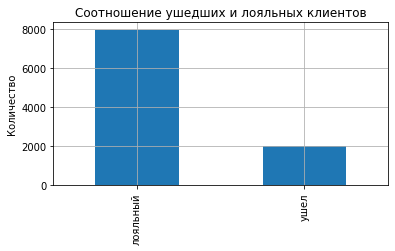

In [922]:
# pandas 
exited_data.plot(
    kind='bar',
    grid=True,
    figsize=(6, 3),
    ylabel='Количество',
    title= 'Соотношение ушедших и лояльных клиентов' #заголовок
);

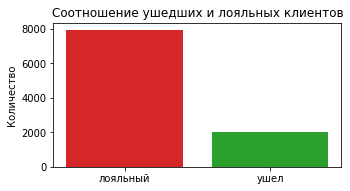

In [923]:
# matplotlib
fig = plt.figure(figsize=(4, 2))
axes = fig.add_axes([0, 0, 1, 1])
axes.set_title('Соотношение ушедших и лояльных клиентов') 
bar_colors = ['tab:red', 'tab:green'] 
axes.set_ylabel('Количество') 
axes.bar(
    x=exited_data.index,
    height=exited_data,
    color=bar_colors
 );

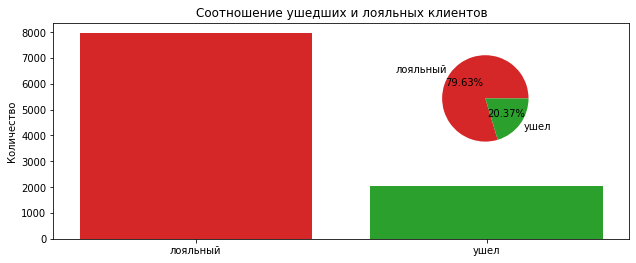

In [924]:
# для тренировки сделаем вложенный круговую диаграмму на фоне столбчатой
#визуализация главного графика
fig = plt.figure(figsize=(8, 3))
main_axes = fig.add_axes([0, 0, 1, 1])
bar_colors = ['tab:red', 'tab:green'] 
main_axes.bar(x = exited_data.index, 
              height = exited_data,
              color=bar_colors);
main_axes.set_ylabel('Количество')
main_axes.set_title('Соотношение ушедших и лояльных клиентов')

#визуализация вспомогательного графика
insert_axes = fig.add_axes([0.5, 0.4, 0.5, 0.5])
insert_axes.pie(exited_data,
                labels=list(exited_data.index),
                autopct='%0.2f%%',
                colors=bar_colors);


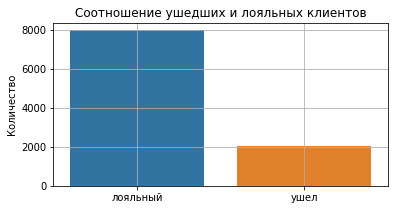

In [925]:
# seaborn
fig = plt.figure(figsize=(6, 3))
barplot=sns.barplot(y=exited_data, 
            x=exited_data.index, 
            orient='v',
            )
barplot.set_title('Соотношение ушедших и лояльных клиентов');
barplot.set_ylabel('Количество');
barplot.grid()

In [926]:
# Plotly
#строим график
fig = px.bar(
    exited_data, #датафрейм
    y="Exited", #ось y
    text = 'Exited', #текст на столбцах
    orientation='v', #ориентация графика
    height=400, #высота
    width=500, #ширина
    title='Соотношение ушедших и лояльных клиентов', #заголовок
 )
#отображаем его
fig.show()
# сохраняем 
fig.write_html("plotly/1.html")
#fig.write_image("images/1.png")


Ссылка на сохранную диаграмму: [Соотношение ушедших и лояльных клиентов](plotly/1.html "Соотношение ушедших и лояльных клиентов").

![Рисунок](/images/p1.jpg "Соотношение ушедших и лояльных клиентов")



__Вывод: Ушедших приблизительно 5-я часть от всех клиентов в выборке.__


***
__9.2.__ Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. 
Опишите распределение и сделайте выводы.

Рекомендуемые варианты диаграмм: Гистограмма или ящик с усами

In [927]:
# Отфильтруем данные
balances= churn_data[churn_data['Balance']>2500]

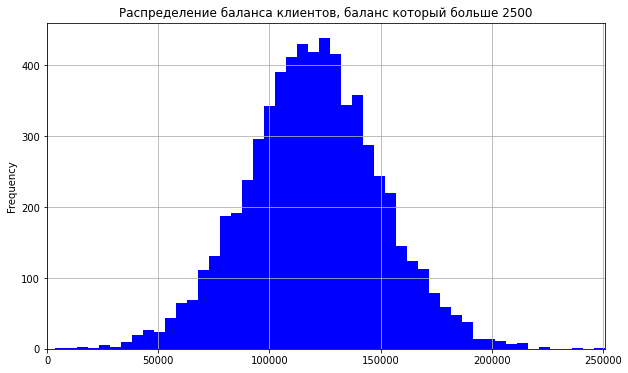

In [928]:
# Построим гистаграмму средствами pandas
balances['Balance'].plot(
    kind='hist',
    figsize=(10, 6),
    title='Распределение баланса клиентов, баланс который больше 2500',
    grid = True,
    color = 'blue',
    bins=50,
    xlim=(0,251000)
);

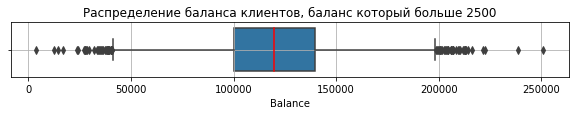

In [929]:
# Построим пример диаграмму "ящик с усами" средствами seaborn
fig = plt.figure(figsize=(10, 1))
boxplot = sns.boxplot(
    data=balances,
    x='Balance',
    medianprops={"color": "red"},
    width=0.8
)
boxplot.set_title('Распределение баланса клиентов, баланс который больше 2500');
boxplot.grid()

__Выводы: Распределение баланса в этой группе клиентов нормальное. Большинство клиентов с балансом от 100 т. до 150 т. долларов. Клиентов с остатком менее 30 т. и более 200 т. очень мало.__


*** 
__9.3.__ Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

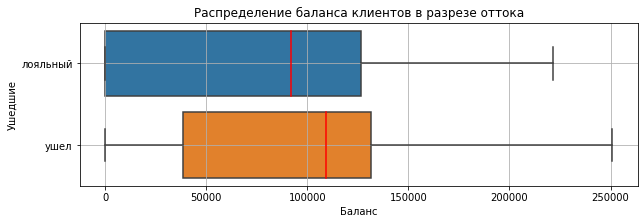

In [930]:
# Построим пример диаграмму "ящики с усами" средствами seaborn
fig = plt.figure(figsize=(10, 3))
boxplot = sns.boxplot(
    data=churn_data,
    y='Exited',
    x='Balance',
    medianprops={"color": "red"},
    #orient='h',
    width=0.8
)
boxplot.set_title('Распределение баланса клиентов в разрезе оттока');
boxplot.set_xlabel('Баланс');
boxplot.set_ylabel('Ушедшие');
boxplot.grid()

Text(0.5, 1.0, 'Распределение баланса клиентов в разрезе оттока')

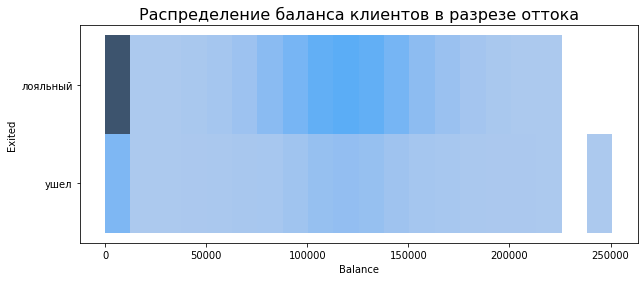

In [931]:
# попробуем гистаграмму средствами seaborn
fig = plt.subplots(figsize=(10, 4))
ax=sns.histplot(
    data=churn_data,
    x='Balance',
    y='Exited',
    bins=20,
    kde=True,
);
ax.set_title('Распределение баланса клиентов в разрезе оттока', fontsize=16)


(0.0, 4e-05)

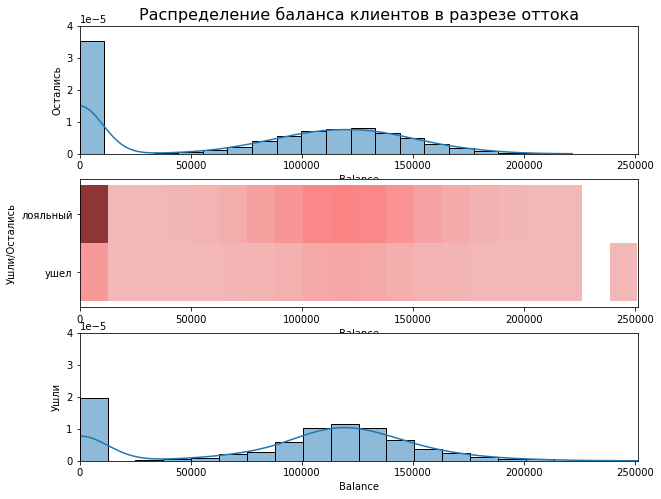

In [932]:
# попробуем совместить гистаграммы средствами seaborn
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 8))
sns.histplot(
    data=churn_data[churn_data['Exited']=='лояльный'],
    x='Balance',
    bins=20,
    kde=True,
    ax=axes[0],
    stat="density", # попробуем вариант с нормированием
    common_norm=False
);
sns.histplot(
    data=churn_data[churn_data['Exited']=='ушел'],
    x='Balance',
    bins=20,
    kde=True,
    ax=axes[2],
    stat="density", 
    common_norm=False
);
sns.histplot(
    data=churn_data,
    x='Balance',
    y='Exited',
    bins=20,
    color='red',
    ax=axes[1],stat="density", common_norm=False
);
axes[0].set_title('Распределение баланса клиентов в разрезе оттока', fontsize=16)
axes[0].set_ylabel('Остались')
axes[1].set_ylabel('Ушли/Остались')
axes[2].set_ylabel('Ушли')
axes[0].set_xlim(0,251000)
axes[0].set_ylim(0,0.00004)
axes[1].set_xlim(0,251000)
axes[2].set_xlim(0,251000)
axes[2].set_ylim(0,0.00004)

Гистограммы не информативны.

In [933]:
# для сравнения вариант из Plotly
fig = px.box(
    data_frame=churn_data, #датафрейм
    y="Exited", #ось x
    x="Balance", #ось y
    color='Exited', #расцветка в зависимости от страны
    orientation='h', #ориентация графика
    height=300, #высота
    width=600, #ширина
    title='Распределение баланса клиентов в разрезе оттока' #заголовок
)
fig.show()
# сохраняем 
fig.write_html("plotly/3.html")


Ссылка на сохранную диаграмму: [Распределение баланса клиентов в разрезе оттока](plotly/3.html "Распределение баланса клиентов в разрезе оттока").

![Рисунок](/images/p3.JPG "Распределение баланса клиентов в разрезе оттока")



__Вывод: Влияние баланса на отток не существенное. Немного больше среди уходящих клиентов с большим остатком. Возможно, не всех клиентов устраивает доход от размещения средств.__

*** 
__9.4.__ Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

In [934]:
# вариант из Plotly
fig = px.box(
    data_frame=churn_data, #датафрейм
    y="Exited", #ось x
    x="Age", #ось y
    color='Exited', #расцветка в зависимости от страны
    orientation='h', #ориентация графика
    height=300, #высота
    width=600, #ширина
    title='Распределение возраста клиентов в разрезе оттока' #заголовок
)
fig.show()
# сохраняем 
fig.write_html("plotly/4.html")

Ссылка на сохранную диаграмму: [Распределение возраста клиентов в разрезе оттока](plotly/4.html "Распределение возраста клиентов в разрезе оттока").

![Рисунок](/images/p4.JPG "Распределение возраста клиентов в разрезе оттока")


In [935]:
# группировка данных
age_gr=churn_data.pivot_table(
    values='Surname',
    index='Age',
    columns='Exited',
    aggfunc ='count',
    fill_value=0
)
display(age_gr.head())

Exited,лояльный,ушел
Age,,
18,20,2
19,26,1
20,38,2
21,50,3
22,72,12


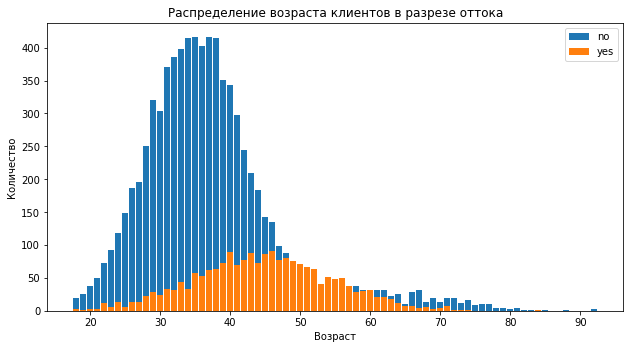

In [936]:
# столчатая диаграмма по двум значениям средствами matplotlib

fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.set_title('') 
axes.set_ylabel('Amount') 
ax1=axes.bar(
    x=age_gr.index,
    height=age_gr['лояльный'],
    label='no'
)
ax2=axes.bar(
    x=age_gr.index,
    height=age_gr['ушел'],
    label='yes'
 );

axes.set_ylabel('Количество')
axes.set_xlabel('Возраст')
axes.set_title('Распределение возраста клиентов в разрезе оттока')
axes.legend()

plt.show()

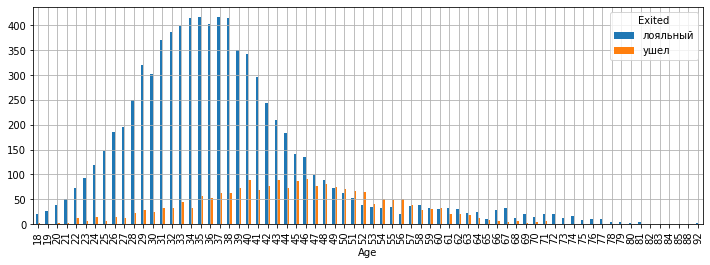

In [937]:
# вариант средствами pandas
age_gr.plot( 
    kind='bar', 
    grid=True, 
    figsize=(12, 4), 
);

__Вывод: Отток смещен в сторону возрастных клиентов. Следует обратить внимание на клиентов в возрасте от 35 до 55 лет.__

***
__9.5.__ Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

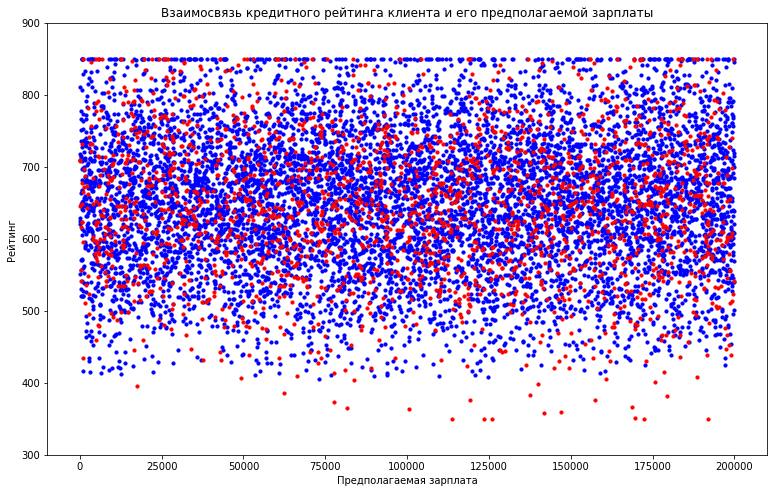

In [956]:
# matplotlib
fig = plt.figure(figsize=(10, 6))
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(
    x=churn_data[churn_data['Exited']=='лояльный']['EstimatedSalary'], 
    y=churn_data[churn_data['Exited']=='лояльный']['CreditScore'], 
    s=10,
    marker='o',
    c = 'blue'
);
axes.scatter(
    x=churn_data[churn_data['Exited']=='ушел']['EstimatedSalary'], 
    y=churn_data[churn_data['Exited']=='ушел']['CreditScore'], 
    s=10,
    marker='o',
    c = 'red'
);
axes.set_ylabel('Рейтинг')
axes.set_ylim(300,900)
axes.set_xlabel('Предполагаемая зарплата')
axes.set_title('Взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты')
plt.show()

__Вывод: явной взаимосвязи не вижу. Только если это: Клиенты с рейтингом ниже 400 уходят. Ну и хорошо.__

***
__9.6.__ Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

In [939]:
# подготовим данные
gender_data = churn_data[churn_data['Exited']=='ушел']['Gender'].value_counts()
display(gender_data)

Female    1139
Male       898
Name: Gender, dtype: int64

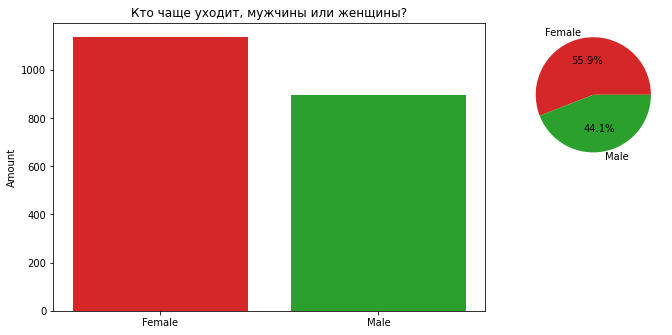

In [940]:
# matplotlib
# вложенная круговую диаграмма на фоне столбчатой

fig = plt.figure(figsize=(10, 4))
main_axes = fig.add_axes([0, 0, 0.6, 1])
bar_colors = ['tab:red', 'tab:green'] 
main_axes.bar(x = gender_data.index, 
              height = gender_data,
              color=bar_colors);
main_axes.set_ylabel('Amount')
main_axes.set_title('Кто чаще уходит, мужчины или женщины?')

#визуализация вспомогательного графика
insert_axes = fig.add_axes([0.5, 0.5, 0.5, 0.5])
insert_axes.pie(gender_data,
                labels=list(gender_data.index),
                autopct='%0.1f%%',
                colors=bar_colors);


__Вывод: Женщины.__

***
__9.7.__ Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

In [941]:
# группировка данных
nop_gr=churn_data.pivot_table(
    values='Surname',
    index='NumOfProducts',
    columns='Exited',
    aggfunc ='count',
    fill_value=0
)
display(nop_gr)
# приведем к проценту
nop_gr['sum']=nop_gr['лояльный']+nop_gr['ушел']
nop_gr['лояльный']=nop_gr['лояльный']/nop_gr['sum']*100
nop_gr['ушел']=nop_gr['ушел']/nop_gr['sum']*100
nop_gr = nop_gr.drop(['sum'], axis=1)
display(nop_gr)

Exited,лояльный,ушел
NumOfProducts,,
1,3675,1409
2,4242,348
3,46,220
4,0,60


Exited,лояльный,ушел
NumOfProducts,,
1,72.285602,27.714398
2,92.418301,7.581699
3,17.293233,82.706767
4,0.000000,100.000000


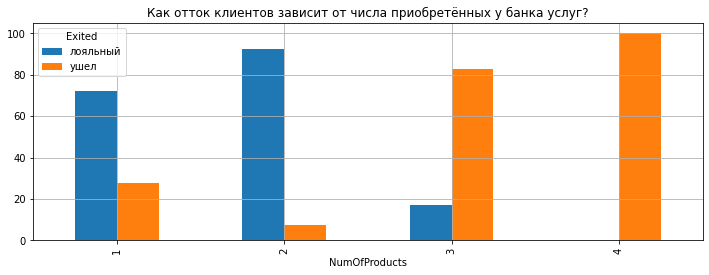

In [942]:
# вариант средствами pandas
nop_gr.plot( 
    kind='bar', 
    grid=True, 
    figsize=(12, 4), 
    title='Как отток клиентов зависит от числа приобретённых у банка услуг?'
);

__Вывод: чем больше продуктов банка у клиента тем вероятнее уход.__

***
__9.8.__ Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

In [943]:
# группировка данных
act_gr=churn_data.pivot_table(
    values='Surname',
    index='IsActiveMember',
    columns='Exited',
    aggfunc ='count',
    fill_value=0
)
display(act_gr)
# приведем к проценту
act_gr['sum']=act_gr['лояльный']+act_gr['ушел']
act_gr['лояльный']=act_gr['лояльный']/act_gr['sum']*100
act_gr['ушел']=act_gr['ушел']/act_gr['sum']*100
act_gr = act_gr.drop(['sum'], axis=1)
display(act_gr)

Exited,лояльный,ушел
IsActiveMember,,
не активный,3547,1302
активный,4416,735


Exited,лояльный,ушел
IsActiveMember,,
не активный,73.149103,26.850897
активный,85.730926,14.269074


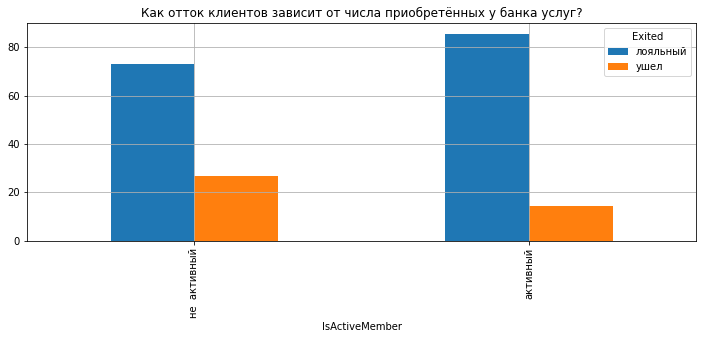

In [944]:
# вариант средствами pandas
act_gr.plot( 
    kind='bar', 
    grid=True, 
    figsize=(12, 4), 
    title='Как отток клиентов зависит от числа приобретённых у банка услуг?'
);

Вывод: Признак активности клиента снижает вероятность ухода почти в 2 раза. Банку следует стимулировать клиента быть активным.

__9.9.__ В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [945]:

# доли ушедших клиентов по странам
country_gr=churn_data.pivot_table(
    values='Surname',
    index='Geography',
    columns='Exited',
    aggfunc ='count',
    fill_value=0,
)
display(country_gr)
# приведем к проценту
country_gr['sum']=country_gr['лояльный']+country_gr['ушел']
country_gr['лояльный']=country_gr['лояльный']/country_gr['sum']*100
country_gr['ушел']=country_gr['ушел']/country_gr['sum']*100
country_gr = country_gr.drop(['sum'], axis=1)
country_gr['страна']=country_gr.index
display(country_gr)


Exited,лояльный,ушел
Geography,,
France,4204,810
Germany,1695,814
Spain,2064,413


Exited,лояльный,ушел,страна
Geography,,,
France,83.845233,16.154767,France
Germany,67.556796,32.443204,Germany
Spain,83.326605,16.673395,Spain


In [946]:
#строим график
fig = px.choropleth(
    data_frame=country_gr, #DataFrame
    locations='страна', #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой Plotly
    color="ушел", #от чего зависит цвет
 #   animation_frame="date", #анимационный бегунок
    #range_color=[0, 30e6], #диапазон цвета
    title='В какой стране доля ушедших клиентов больше?', #заголовок
    width=600, #ширина
    height=400, #высота
    color_continuous_scale='Reds' #палитра цветов
)

fig.show()
# сохраняем 
fig.write_html("plotly/9.html")

Ссылка на сохранную диаграмму: [В какой стране доля ушедших клиентов больше?](plotly/9.html "В какой стране доля ушедших клиентов больше?").

![Рисунок](/images/map.JPG "В какой стране доля ушедших клиентов больше?")

__Вывод: в Германии больше ушедших клиентов (в процентном отношении к клиентам этой страны)__

***
__9.10.__ Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

In [947]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
churn_data['CreditScoreCat']=churn_data['CreditScore'].apply(get_credit_score_cat)
churn_data['CreditScoreCat'] = churn_data['CreditScoreCat'].astype('category') 
#display(churn_data.info())

Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

In [948]:
# все клиенты
score_exited = churn_data.pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure',
    aggfunc='count',
    fill_value=0
)
#display(score_exited)
score_exited2 = churn_data[churn_data['Exited']=='ушел'].pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure',
    aggfunc='count',
    fill_value=0
)
#display(score_exited2)
score_exited = score_exited2 / score_exited *100
display(score_exited)

Tenure,0,1,2,3,4,5,6,7,8,9,10
CreditScoreCat,,,,,,,,,,,
Excellent,27.500000,20.833333,13.725490,16.831683,13.186813,23.333333,24.137931,12.765957,19.607843,27.083333,25.490196
Fair,21.739130,21.559633,21.304348,21.645022,19.724771,20.689655,23.636364,17.110266,20.901639,19.004525,20.535714
Good,20.382166,20.360825,18.734177,20.596206,19.512195,21.447028,18.285714,19.189189,15.235457,19.466667,19.780220
Poor,22.641509,25.939850,21.176471,21.224490,23.320158,19.915254,17.991632,15.126050,21.457490,25.108225,16.949153
Very_Poor,44.444444,25.373134,15.151515,28.571429,29.310345,14.925373,22.535211,20.634921,25.352113,22.950820,33.333333


[Text(0.5, 15.0, 'Года'), Text(32.09375, 0.5, 'Рейтинг')]

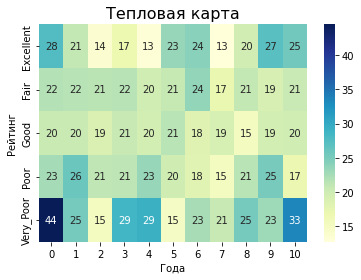

In [954]:
heatmap = sns.heatmap(data=score_exited , 
                      cmap='YlGnBu',
                      annot=True)

heatmap.set_title('Тепловая карта', fontsize=16)
heatmap.set(xlabel='Года', ylabel='Рейтинг')

__Выводы: Наиболее высокий отток клиентов с самым низким рейтонгом и уходят они в больше всего в первый же год (44 процента в первый год, и 33 процента для тех, кто с банком около 10 лет).
В категории с наивысшим кредитным рейтингом так же наблюдается увеличенный отток. 28 процентов клиентов, пользовавшихся услугами банка до года, прекратило сотрудничество с банком.__